# Analytical solution of the 1-D diffusion equation

As discussed in class, many physical problems encountered in the field of geosciences can be described with a diffusion equation, i.e. _relating the rate of change in time to the curvature in space_:

$$\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2}$$

Here, $u$ represents any type of property (e.g. temperature, pressure, hight, ...) and $\kappa$ is the proportionality constant, a general _diffusivity_.

As this equation is so general, we will investigate some of its properties and typical solutions here.

In [1]:
# first some basic Python imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from ipywidgets import interactive
plt.rcParams['figure.figsize'] = [8., 5.]
plt.rcParams['font.size'] = 16
from IPython.display import Audio, display

## Steady-state solution

Before actually looking at the change in time, let's take a look at what happens when things _do not_ change anymore - i.e. when the time derivative is equal to zero:

$$\frac{\partial u}{\partial t} = 0$$

So:

$$\kappa \frac{\partial^2 u}{\partial x^2} = 0$$ 

and as $\kappa \ne 0$:

$$\frac{\partial^2 u}{\partial x^2} = 0$$ 

What does this eqution mean? The change of gradient (i.e. the curvature) is $\ne 0$, so the solution has to be linear, for a 1-D problem!

Q: what happens for multidimensional problems?

So: how can we now obtain a solution for an actual problem? Note that, for any defined domain $X$, there are infinitely many solutions which would satisfy this equation, e.g. let's look at a couple random realizations:

In [2]:
def plot_steady_state(n=1):
    # set number of lines with n
    np.random.seed(seed=12345)
    pts_left = np.random.uniform(0,1, size=(20))
    pts_right = np.random.uniform(0,1, size=(20))
    plt.plot((np.zeros(n),np.ones(n)),(pts_left[:n],pts_right[:n]), '-')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.show()

In [3]:
v = interactive(plot_steady_state, n=(1,20,1))
display(v)

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

So: **which one of these lines is the one which is the solution to a specific problem?**

It is clear that we need to define some aspects to _fix_ the line in space.

Q: which aspects could this be?

Of course, one solution is to fix points on both sides of the domain, then we only have one solution left, e.g.:

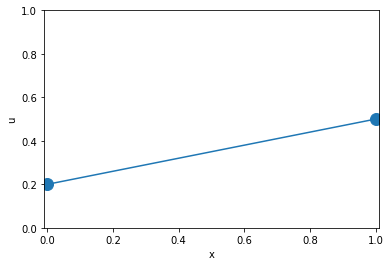

In [4]:
pt_left = 0.2
pt_right = 0.5
plt.plot((0,1),(pt_left, pt_right), 'o-', markersize=12)
plt.xlim([-0.01,1.01])
plt.ylim([0,1])
plt.xlabel('x')
plt.ylabel('u')
plt.show()

Q: which other options can you think of?

Note: on a mathematical level, these additional conditions are required to obtain a solution are called **boundary conditions**!

## Transient solution

Let's now consider the case where we have a transient solution, evolving over time. As before, in order to define a solution, we have to define *boundary conditions*. In addition, as we consider changes over time, we have to define where we *start* - and this is defined with the *initial condition*.

A typical set of conditions, encountered in many physical problems, is related to an initial uniform state, which is suddenly perturbed on one side of an "infinite half-space":

<img src="./half_space_cooling.png">


The conditions for this model for $T(x,t)$ are, accordingly:

- Initial condition: $T(x,0) = T_0$
- Boundary conditions: 
    - $T(0,t) = T_1$
    - $T(\infty,t) = T_0$
    
An analytical solution for this problem can be derived, and it has the general form:

$$ T(x,t) = T_1 + (T_0 - T_1)\;\mbox{erf}\left(\frac{x}{2\sqrt{\kappa t}}\right)$$

Where "erf" is the so-called "error function" (due to its relationship with the normal distribution), defined as:

$$\mbox{erf}(\eta) = \frac{2}{\sqrt{\pi}} \int_0^\eta e^{-u^2}\;du$$

### Error function

Here a plot of the error function:

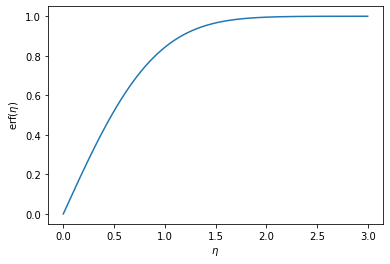

In [5]:
xvals = np.arange(0,3.,0.001)
plt.plot(xvals, scipy.special.erf(xvals))
plt.xlabel('$\eta$')
plt.ylabel('erf($\eta$)')
plt.show()

Looking at the shape of this curve, it is intuitively evident that it is related to the diffusion problem considered above: a "pulse" of some sort is propagating into a domain (here in x-direction). Better seen maybe even when inspecting the "complementary error function":

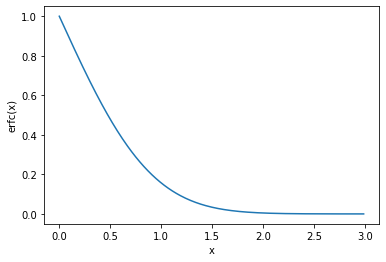

In [6]:
xvals = np.arange(0,3,0.01)
plt.plot(xvals, scipy.special.erfc(xvals))
plt.xlabel('x')
plt.ylabel('erfc(x)')
plt.show()

### Physical example

Let's now consider a "dimensionalized" example, considering actual physical parameters, recall first:

$$ T(x,t) = T_1 + (T_0 - T_1)\;\mbox{erf}\left(\frac{x}{2\sqrt{\kappa t}}\right)$$

If we consider a case of thermal diffusion, then a typical property would be:

- $\kappa = 10^{-6}$

**Q: what do you think, how far does a temperature pulse in such a medium propagate in 1 sec, 1 day, 1 year?**

In [7]:
xvals = np.arange(0.,0.006,0.0001)
t = 1 # second!!
def diffusion(x,t):
    kappa = 1E-6
    T_0 = 0
    T_1 = 1
    return T_1 + (T_0 - T_1) * scipy.special.erf(x/(2 * np.sqrt(kappa*t)))

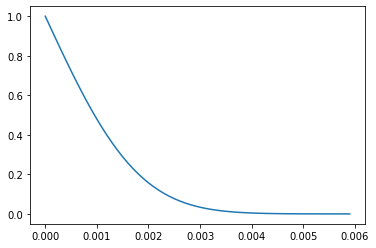

In [8]:
plt.plot(xvals, diffusion(xvals, t))
plt.show()

Side note: how can we get a feeling for the propagation of such a pulse, on the basis of this analytical solution? Note that, in theory, the erf does never actually reach 0 (it is only asymptotic!).

Idea: define a *point* at which a change in property should be noticable. Typical decision:

$l_c = 2\sqrt{\kappa t}$

**Q: which point in the diagram does this value correspond to? And what is the relationship to the erf-plot?**

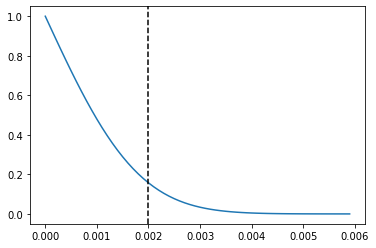

In [9]:
plt.plot(xvals, diffusion(xvals, t))
plt.axvline(2*np.sqrt(1E-6 * t), color='k', linestyle='--')
plt.show()

*Side note*: if you consider again where the definition of the error function actually comes from: what does this value correspond to?

Let's now consider a more geologically meaningful example: propagation over a longer time period, over a greater distance.

**Q: back to the characteristic length: how far would a pulse propagate over, say, 1000 years?**

In [10]:
year_sec = 3600.*24*365
char_length = 2 * np.sqrt(1E-6 * 1000 * year_sec)
print(char_length)

355.1675660867698


Let's look at such a propagation in a dynamic system:

In [11]:
xvals = np.arange(0,1000)
def plot_temp(year=50):
    plt.plot(xvals, diffusion(xvals, year * year_sec))
    plt.show()
v = interactive(plot_temp, year=(50,2001,150))
display(v)

interactive(children=(IntSlider(value=50, description='year', max=2001, min=50, step=150), Output()), _dom_cla…

Or, in comparison to time evolution:

In [14]:
xvals = np.arange(0,1000)
def plot_temp(year=50):
    for i in range(int(year/50)):
        plt.plot(xvals, diffusion(xvals, (i+1)*50 * year_sec), 
             color=plt.cm.copper_r(i/50), lw=2)
    plt.show()
v = interactive(plot_temp, year=(50,2001,150))
display(v)

interactive(children=(IntSlider(value=50, description='year', max=2001, min=50, step=150), Output()), _dom_cla…

## Additional content

### Relationship error function - Normal distribution



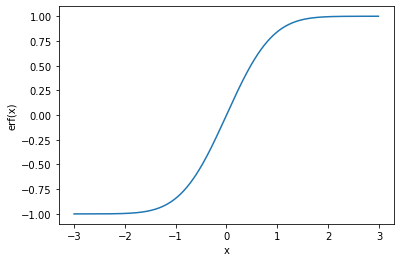

In [13]:
xvals = np.arange(-3,3,0.01)
plt.plot(xvals, scipy.special.erf(xvals))
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.show()